In [1]:
!pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/usroad_accident/US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
len(df) # total number of rows in the data

7728394

## EDA (exploratory data analysis)

In [6]:
"""
1)Replacing Null values
2)Attribute selection for categorical values based on mean aggregation and annova test
2)Handling Outliers (for numeric data)
3)Attribute selection for numeric data columns
4)Encoding and Normalization
5)Data spliting into train 75%,val 15%,test 10%
"""

'\n1)Replacing Null values\n2)Attribute selection for categorical values based on mean aggregation and annova test\n2)Handling Outliers (for numeric data)\n3)Attribute selection for numeric data columns\n4)Encoding and Normalization\n5)Data spliting into train 75%,val 15%,test 10%\n'

### Handling Nan values

In [7]:
dfn = df.isna().sum() # total number of missing values in each column
dfn = pd.DataFrame(dfn,columns =['count'])
dfn.head(10)

,count
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,3402762
End_Lng,3402762
Distance(mi),0


In [8]:
dfn = dfn[dfn['count']>0] # extracting the indexes which has more than 0 count of null values
dfn.head()

,count
End_Lat,3402762
End_Lng,3402762
Description,5
Street,10869
City,253


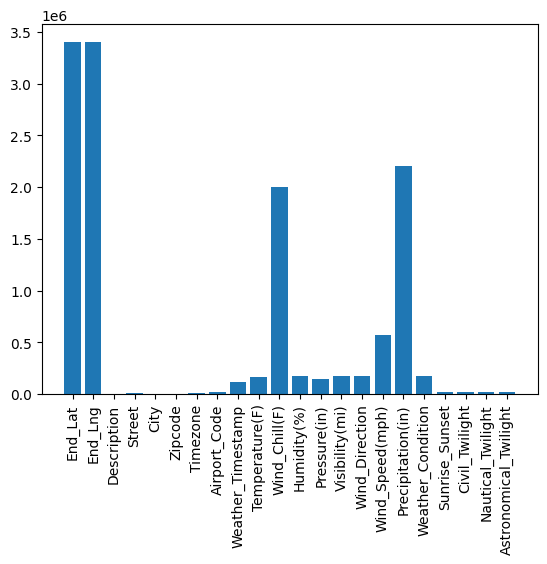

In [9]:
import matplotlib.pyplot as plt
plt.bar(dfn.index,dfn['count'])
plt.xticks(rotation = 90)
plt.show()

In [10]:
# we replace the null values in each column based on the data distribuion in it

In [11]:
li = list(dfn.index)
li

['End_Lat',
 'End_Lng',
 'Description',
 'Street',
 'City',
 'Zipcode',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [12]:
dfn['dtype']= [df[i].dtype for i in li]
dfn.head()

,count,dtype
End_Lat,3402762,float64
End_Lng,3402762,float64
Description,5,object
Street,10869,object
City,253,object


In [13]:
dfn1 = dfn[dfn['dtype']!='object'] # the columns with numeric values
dfn2 = dfn[dfn['dtype']=='object'] # the columns with categorical values

In [14]:
print(dfn1)
print(dfn2)

                     count    dtype
End_Lat            3402762  float64
End_Lng            3402762  float64
Temperature(F)      163853  float64
Wind_Chill(F)      1999019  float64
Humidity(%)         174144  float64
Pressure(in)        140679  float64
Visibility(mi)      177098  float64
Wind_Speed(mph)     571233  float64
Precipitation(in)  2203586  float64
                        count   dtype
Description                 5  object
Street                  10869  object
City                      253  object
Zipcode                  1915  object
Timezone                 7808  object
Airport_Code            22635  object
Weather_Timestamp      120228  object
Wind_Direction         175206  object
Weather_Condition      173459  object
Sunrise_Sunset          23246  object
Civil_Twilight          23246  object
Nautical_Twilight       23246  object
Astronomical_Twilight   23246  object


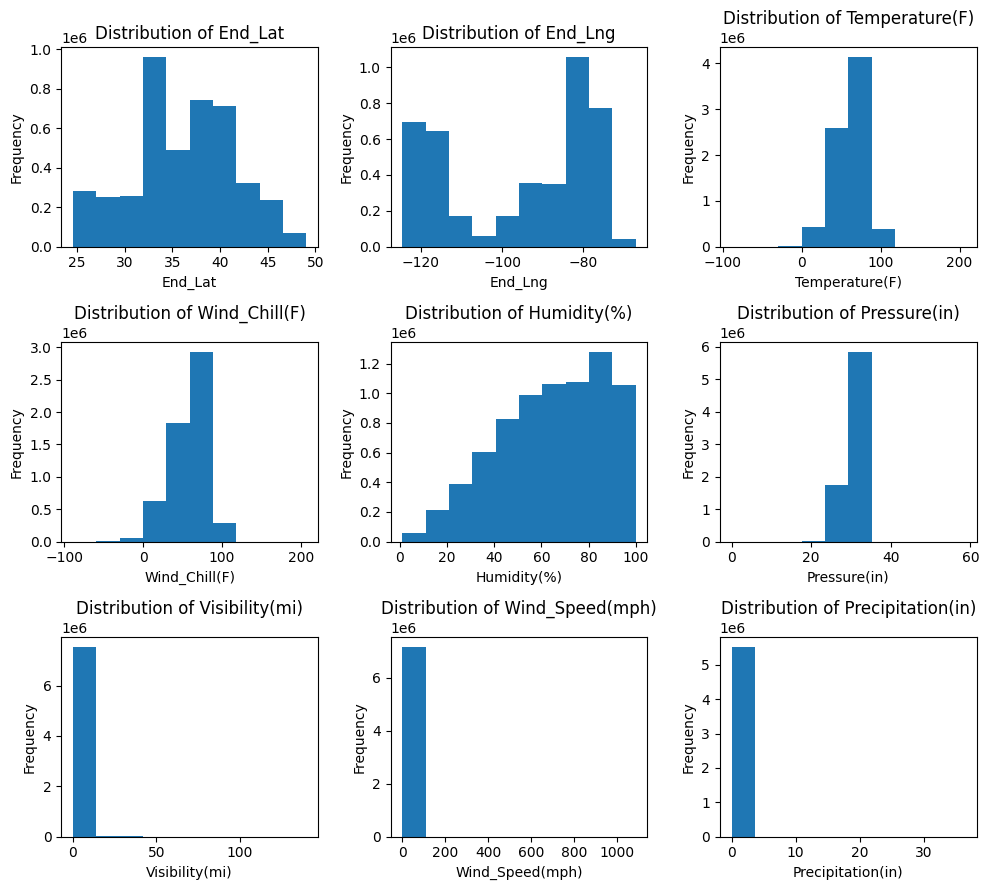

In [15]:
# distribution of all the numeric data columns

import matplotlib.pyplot as plt


num_plots = len(dfn1)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, index in enumerate(dfn1.index):
        df[index].plot(kind='hist', ax=axes[i], title=f'Distribution of {index}')
        axes[i].set_xlabel(index)
        axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [16]:
# As we observe from the above subplots
"""[End_lat, temperatur, wind_chill,pressure] has normal distribution. And remaining attributes are of skewed distribution"""
# for normal distribution, the null values are replace by mean, and for skewed dist. they are replace by median
# for categorical values the null values are generally replace by mode

'[End_lat, temperatur, wind_chill,pressure] has normal distribution. And remaining attributes are of skewed distribution'

In [17]:
# numeric values are replaced by mean and median

df['End_Lat'] = df['End_Lat'].fillna(df['End_Lat'].mean())
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].mean())

df['End_Lng'] = df['End_Lng'].fillna(df['End_Lng'].median())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].median())

for i in dfn2.index:
  df[i] = df[i].fillna(df[i].mode()[0]) # categorical values with mode



In [18]:
df.isna().sum() # No null values are present after replacing them

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,0
End_Lng,0
Distance(mi),0


### Attribute selection (Categorical)

In [19]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,36.261829,-88.02789,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,36.261829,-88.02789,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,36.261829,-88.02789,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,36.261829,-88.02789,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,36.261829,-88.02789,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [20]:
dfo = df.select_dtypes(include=['object']) # extracting the categorical columns
dfb = df.select_dtypes(include=['bool']) # extracting the bool data columns
lio = list(dfo.columns)
lib = list(dfb.columns)
lio,lib

(['ID',
  'Source',
  'Start_Time',
  'End_Time',
  'Description',
  'Street',
  'City',
  'County',
  'State',
  'Zipcode',
  'Country',
  'Timezone',
  'Airport_Code',
  'Weather_Timestamp',
  'Wind_Direction',
  'Weather_Condition',
  'Sunrise_Sunset',
  'Civil_Twilight',
  'Nautical_Twilight',
  'Astronomical_Twilight'],
 ['Amenity',
  'Bump',
  'Crossing',
  'Give_Way',
  'Junction',
  'No_Exit',
  'Railway',
  'Roundabout',
  'Station',
  'Stop',
  'Traffic_Calming',
  'Traffic_Signal',
  'Turning_Loop'])

In [21]:
neg = ['ID','Source','Description']
# neglecting the above variables, as they don't contribute to the target variable

lio = [i for i in lio if i not in neg]

In [22]:
len(lio),len(lib)

(17, 13)

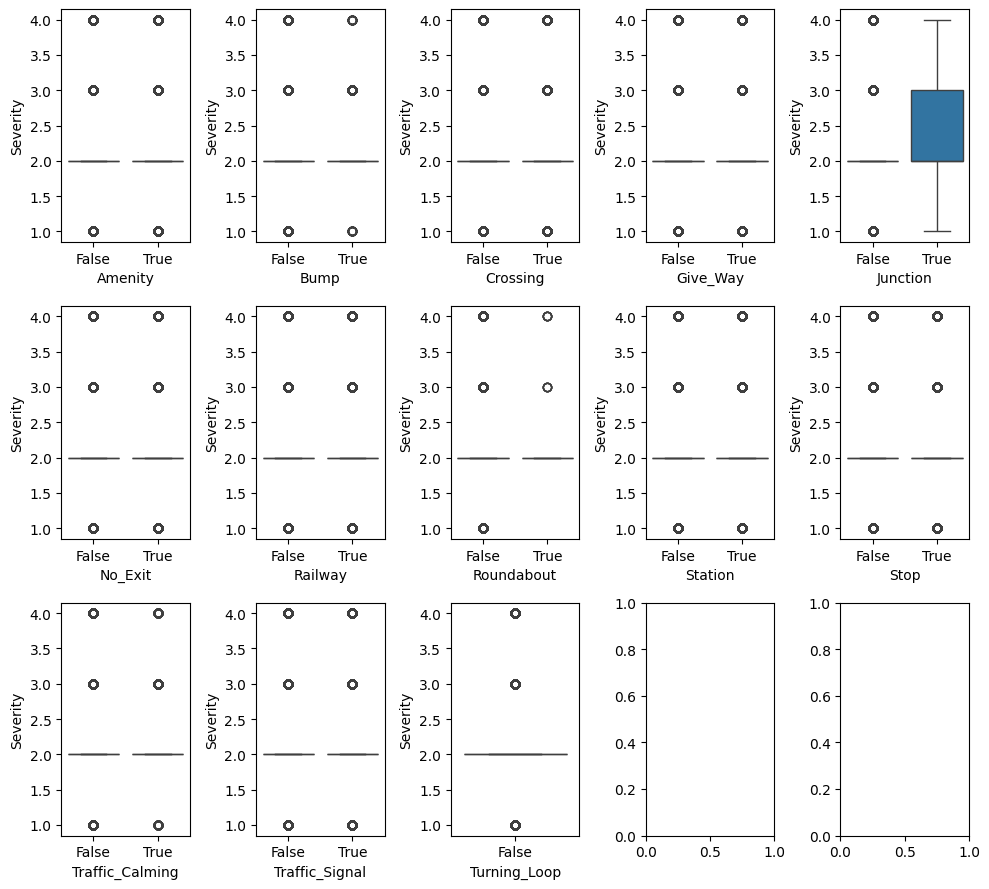

In [23]:
"""Checking the distribution of each bool column with target variable"""

import seaborn as sns

num_plots = len(lib)
num_cols = 5
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, j in enumerate(lib):
        sns.boxplot(x=j,y='Severity',data=df, ax=axes[i])
        axes[i].set_xlabel(j)
        axes[i].set_ylabel('Severity')


plt.tight_layout()
plt.show()

# This will take a couple of minutes to run

In [24]:
# Perform ANOVA to find the any differences in mean of True and False distribution with respect to severity for all binary value attributes

from scipy.stats import f_oneway


p =[]

for i in lib:
  group_true = df[df[i] == True]['Severity']
  group_false = df[df[i] == False]['Severity']
  anova_result = f_oneway(group_true, group_false)
  p.append((i,anova_result.pvalue))

# If the p-value is less than 0.05, the difference between the means is statistically significant.
# i.e null hypothesis (u1=u2) is rejected
# But be carefull that annova p test is senesitive to even the slightest change between the distributions

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [25]:
p

[('Amenity', 0.0),
 ('Bump', 1.2399670754022716e-46),
 ('Crossing', 0.0),
 ('Give_Way', 2.2471630008247653e-40),
 ('Junction', 0.0),
 ('No_Exit', 3.8403809950930874e-182),
 ('Railway', 1.927521781589182e-180),
 ('Roundabout', 3.0940669649574494e-06),
 ('Station', 0.0),
 ('Stop', 0.0),
 ('Traffic_Calming', 8.13962197769082e-53),
 ('Traffic_Signal', 0.0),
 ('Turning_Loop', nan)]

In [26]:
# we can remove 'Turning_Loop' as it has only one value i.e False
# Remaining all has p value < 0.05 i.e they might have some significant mean differences between them

lib.remove('Turning_Loop')

In [27]:
# Now for object data we will find the relevant attributes with annova ( but for multiple means)

# compare the means of the target for each category in each attribute
# If p<0.05 then null hypothesis is rejected i.e (u1=u2..=ui) is rejected

In [28]:
for i in lio:
  print(i,len(df[i].unique()))

Start_Time 6131796
End_Time 6705355
Street 336306
City 13678
County 1871
State 49
Zipcode 825094
Country 1
Timezone 4
Airport_Code 2045
Weather_Timestamp 941331
Wind_Direction 24
Weather_Condition 144
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


In [29]:
# Group by the categorical variable and calculate mean of the target

am = []
for i in lio:
  l = list(df.groupby(i)['Severity'].mean())
  am.append((i,l))
am

[('Start_Time',
  [4.0,
   3.0,
   3.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   3.0,
   2.0,
   3.0,
   3.0,
   2.0,
   3.0,
   2.0,
   3.0,
   3.0,
   2.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   2.0,
   3.0,
   3.0,
   3.0,
   2.5,
   3.0,
   2.0,
   2.0,
   4.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   2.0,
   3.0,
   2.0,
   3.0,
   3.0,
   3.0,
   2.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   3.0,
   3.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   4.0,
   2.0,
   2.0,
   2.0,
   3.0,
   3.0,
   3.0,
   2.0,
   2.0,
   3.0,
   2.0,
   2.0,
   2.0,
   2.0,
   3.0,
   3.0,
   3.0,
   3.0,
   2.0,
   3.0,
   3.0,
   2.0,
   2.0,
   2.0,
   2.0,
   4.0,
   2.0,
   2.0,
   4.0,
   4.0,
   3.0,
   4.0,
   2.0,
   4.0,
   2.0,
   2.0,
   2.0,
   3.0,
   3.0,
   2.0,


In [30]:
for i in am:
  print(i[0],len(i[1]))

Start_Time 6131796
End_Time 6705355
Street 336306
City 13678
County 1871
State 49
Zipcode 825094
Country 1
Timezone 4
Airport_Code 2045
Weather_Timestamp 941331
Wind_Direction 24
Weather_Condition 144
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


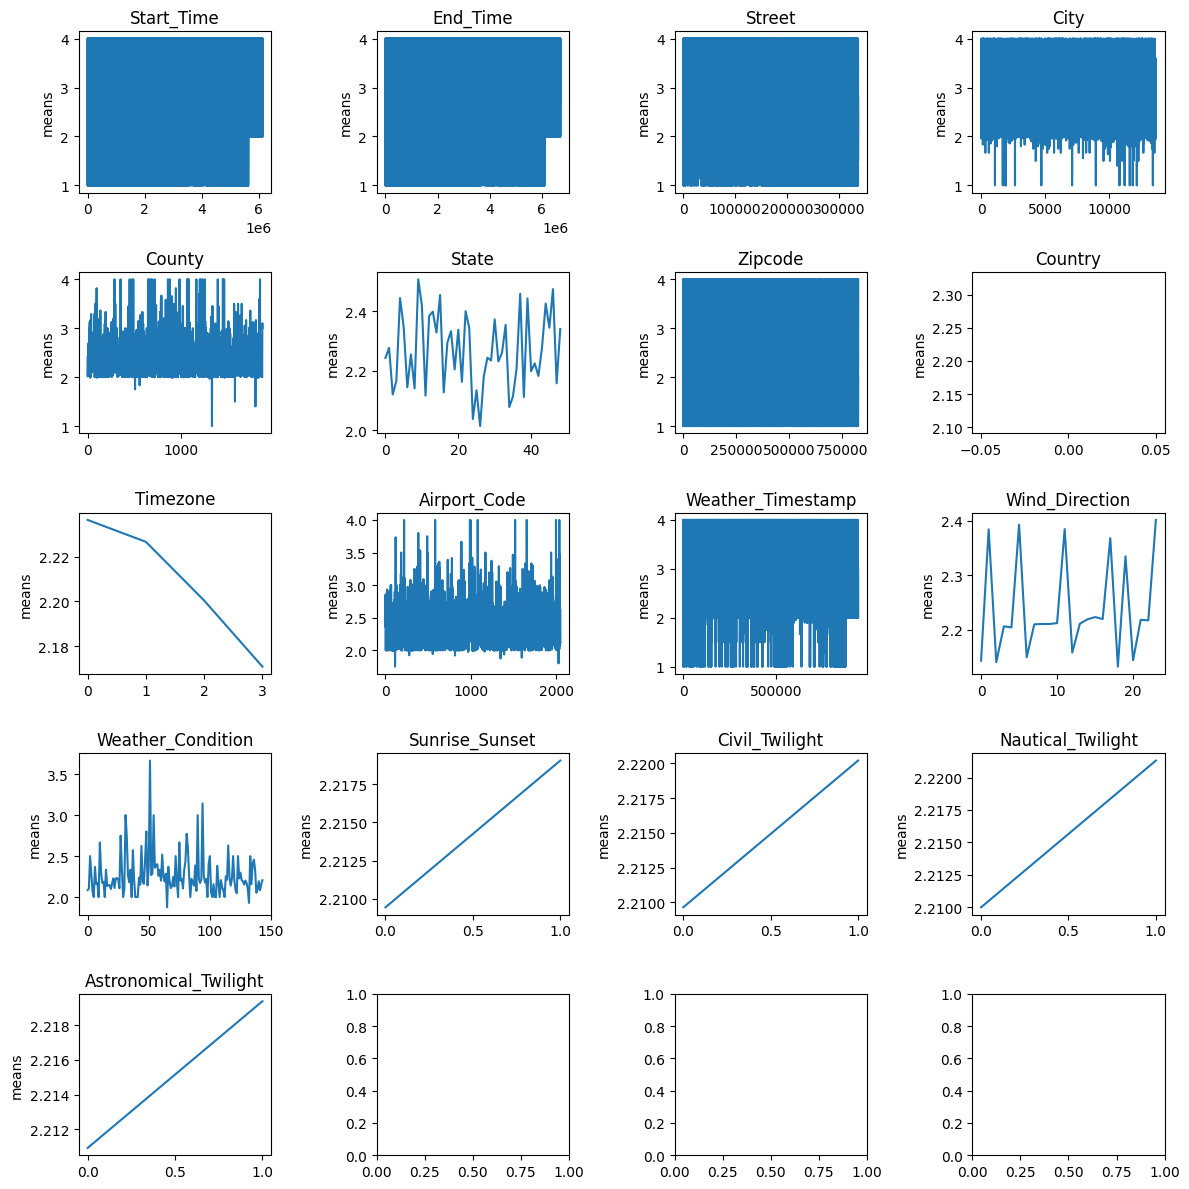

In [31]:

fig, axes = plt.subplots(5, 4, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i,j in enumerate(am):
  ax = axes[i]
  ax.plot(am[i][1])
  ax.set_title(am[i][0])
  ax.set_ylabel('means')

plt.tight_layout()
plt.show()

In [32]:
# now we can see in which the categories means change much and in which they doesn't change
# We got State,County,TimeZone, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomoical_Twilight

In [33]:
lio

['Start_Time',
 'End_Time',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [34]:
to_remove = ['State','Country','Timezone','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
lio = [i for i in lio if i not in to_remove]
lio

['Start_Time',
 'End_Time',
 'Street',
 'City',
 'County',
 'Zipcode',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition']

In [35]:
# now we need to find relevant attributes for numeric values

dfb = df.select_dtypes(include=['float64'])
lin = list(dfb.columns)
lin

['Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

### Outlier Analysis

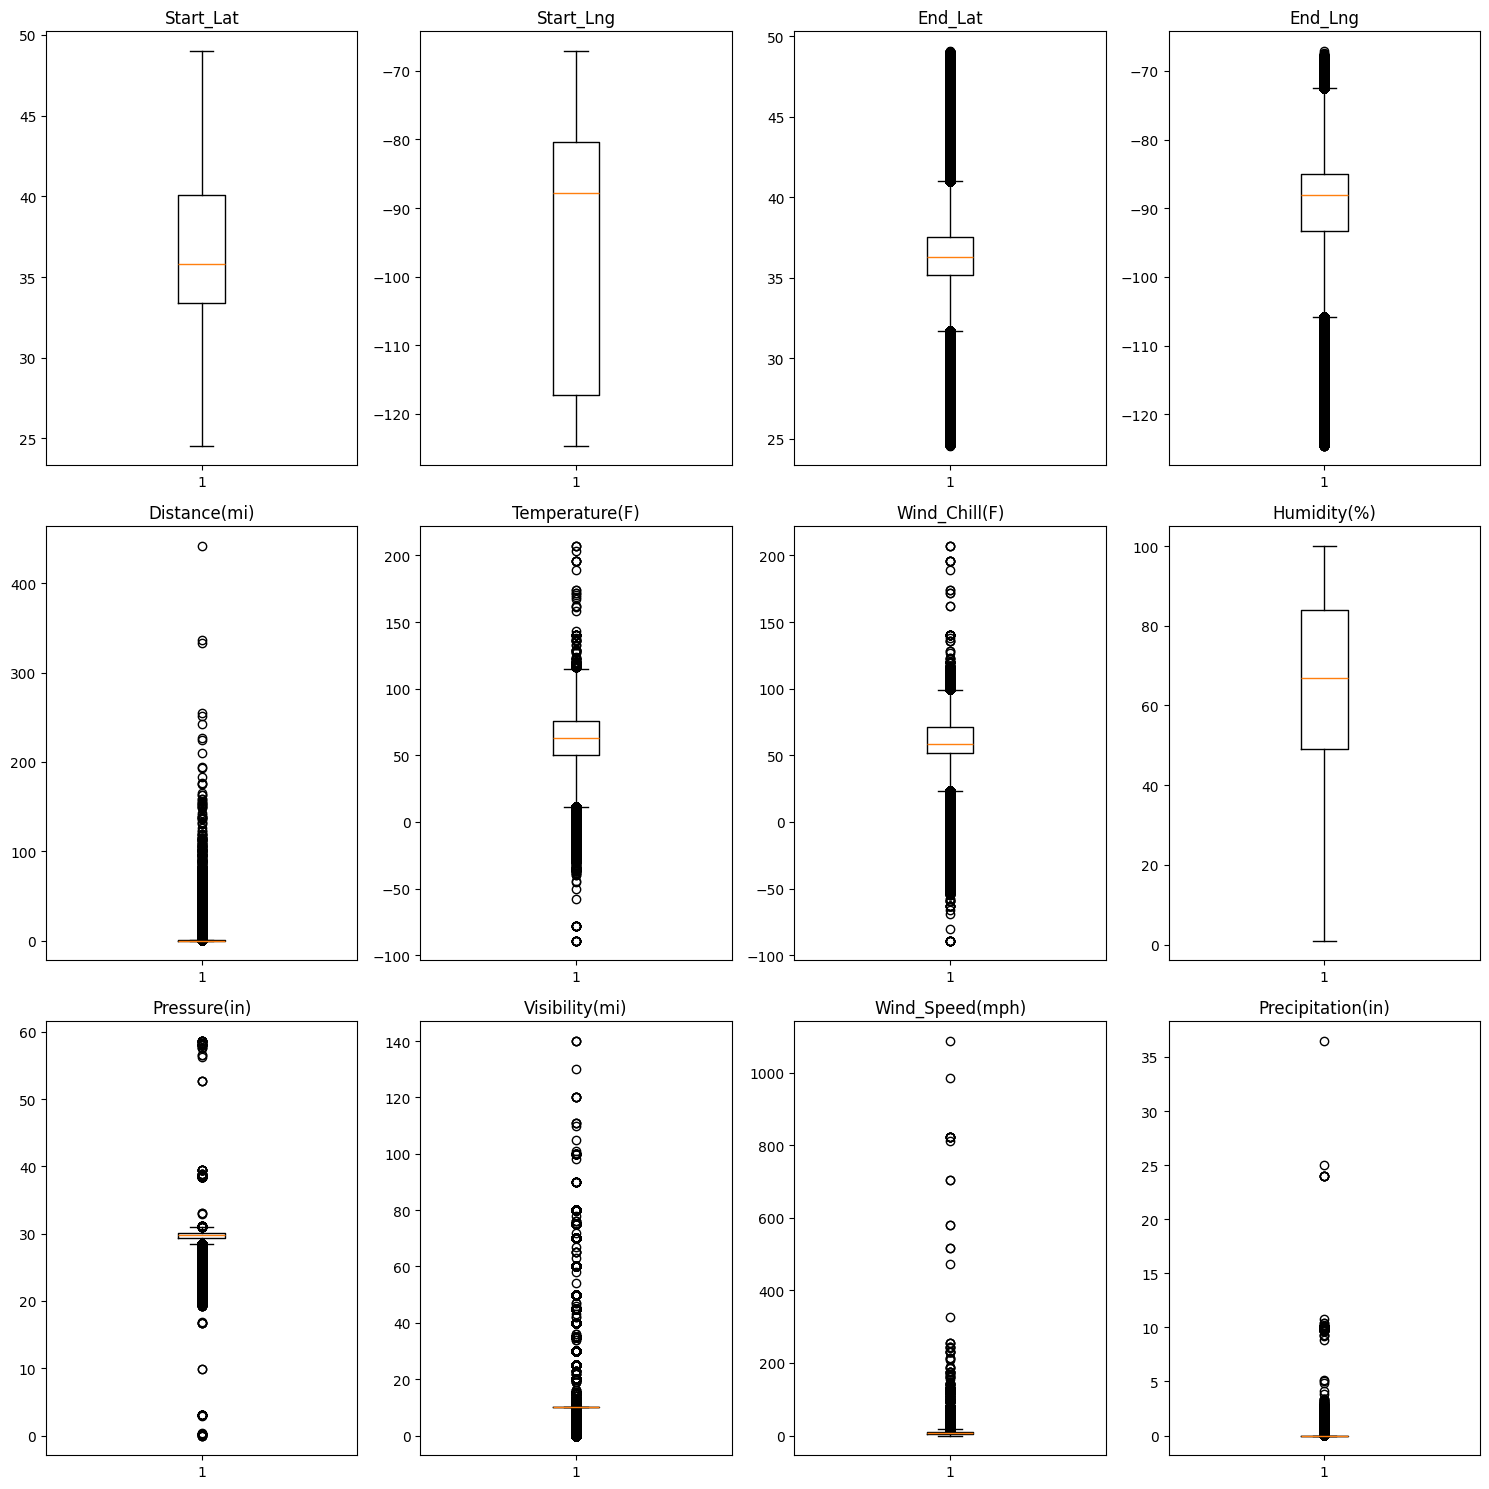

In [36]:
# boxplots of the numeric data to find any outliers

num_plots = len(lin)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig,axes = plt.subplots(num_rows,num_cols,figsize = (15,5*num_rows))
axes = axes.flatten()

for i,j in enumerate(lin):
  ax = axes[i]
  ax.boxplot(df[j])
  ax.set_title(j)

plt.tight_layout()
plt.show()

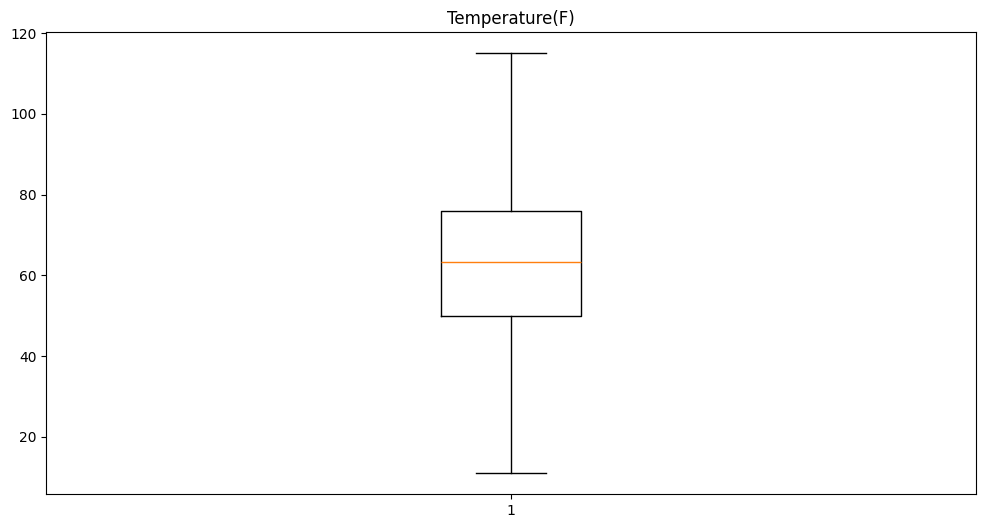

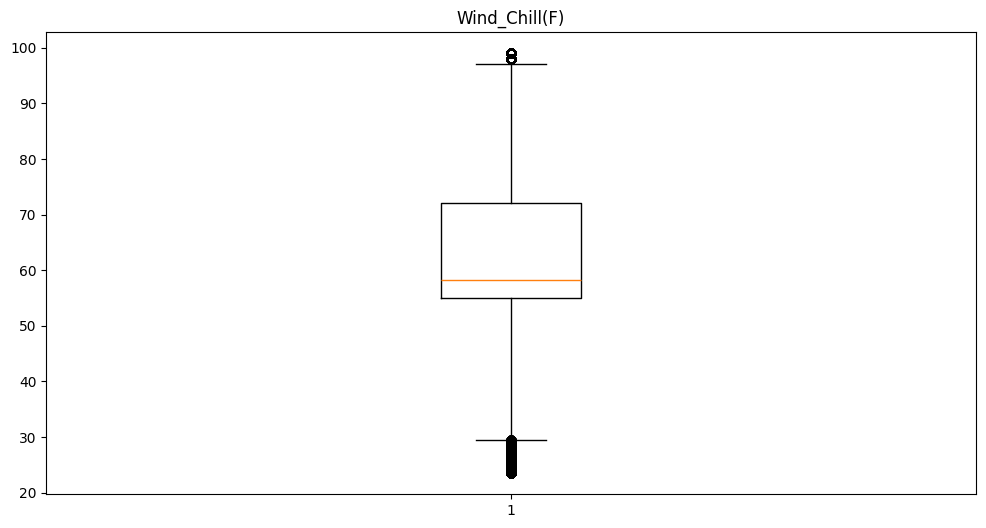

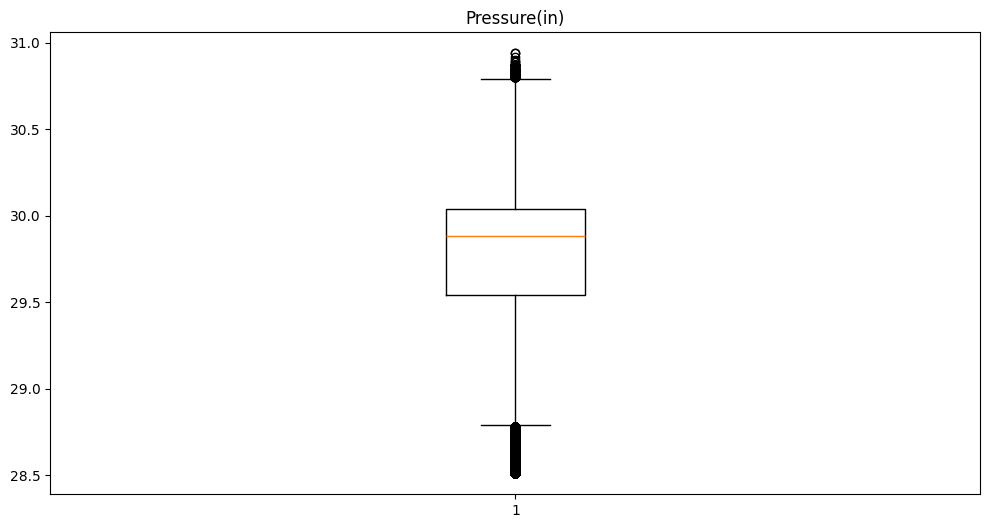

In [37]:
# as we observe there are many outliers in attributes:
negn = ['Temperature(F)','Wind_Chill(F)','Pressure(in)']

# Other attributes are not included, because as if we remove there is no much data remained in that column
# And also removing the outliers in End_Lat and End_Lng might effect the data in other columns, so to maintain data integretiy, they are untouched for now


# IQR method to remove the outliers
def Outlier_Treatment(df1,variable):
    percentile25=df1[variable].quantile(0.25)  #q1
    percentile75=df1[variable].quantile(0.75)  #q3
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    df_new = df1[ (df1[variable]>=lower_limit) & (df1[variable]<=upper_limit) ]
    plt.figure(figsize=(12,6))
    plt.boxplot(df_new[variable])
    plt.title(variable)
    plt.show()
    return df_new
dfn = df
for i in negn:
  dfn = Outlier_Treatment(dfn,i)

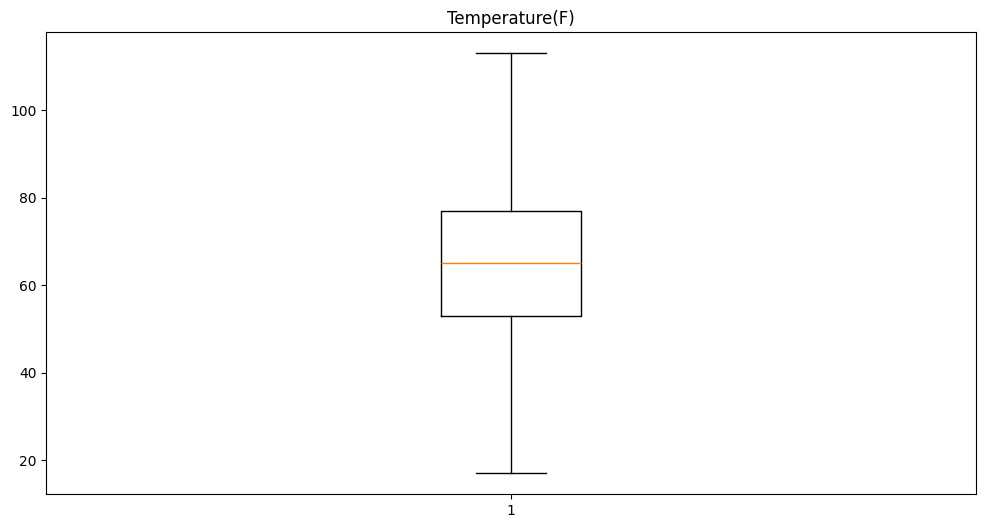

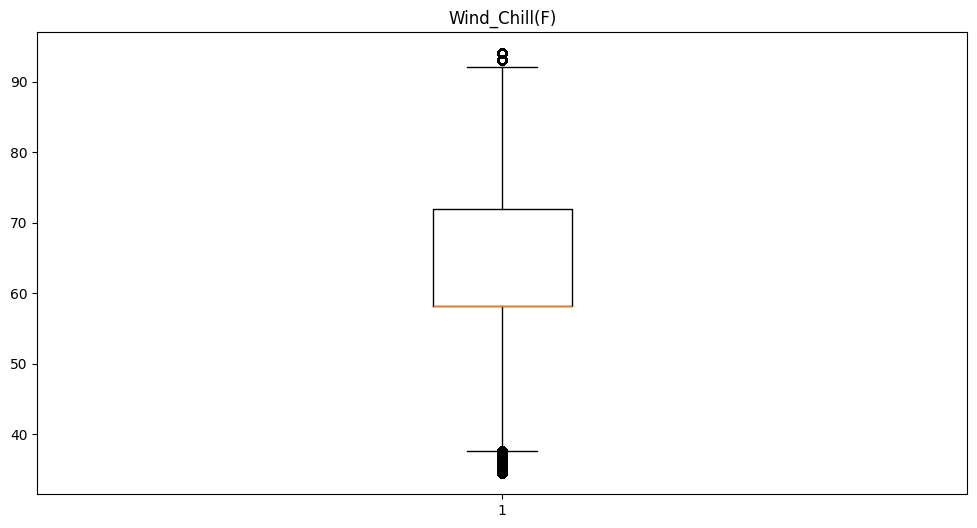

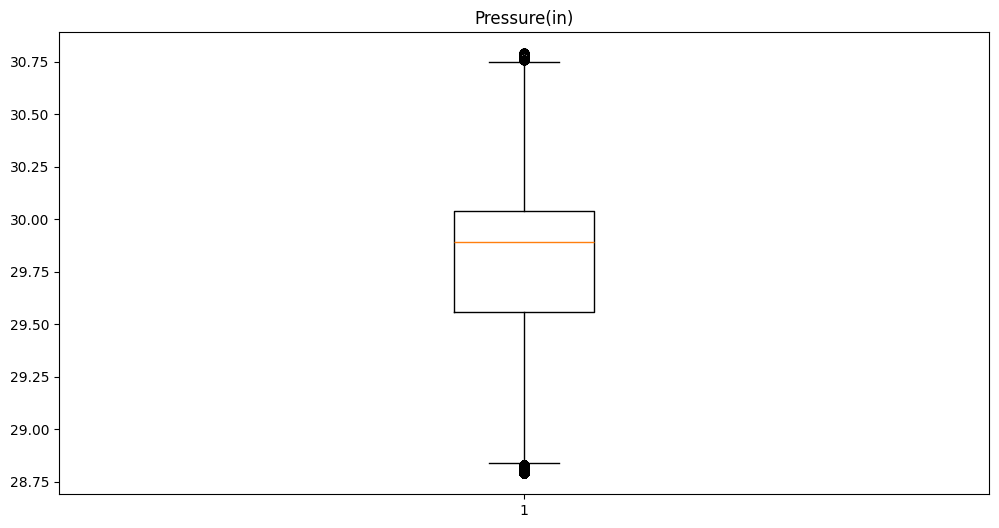

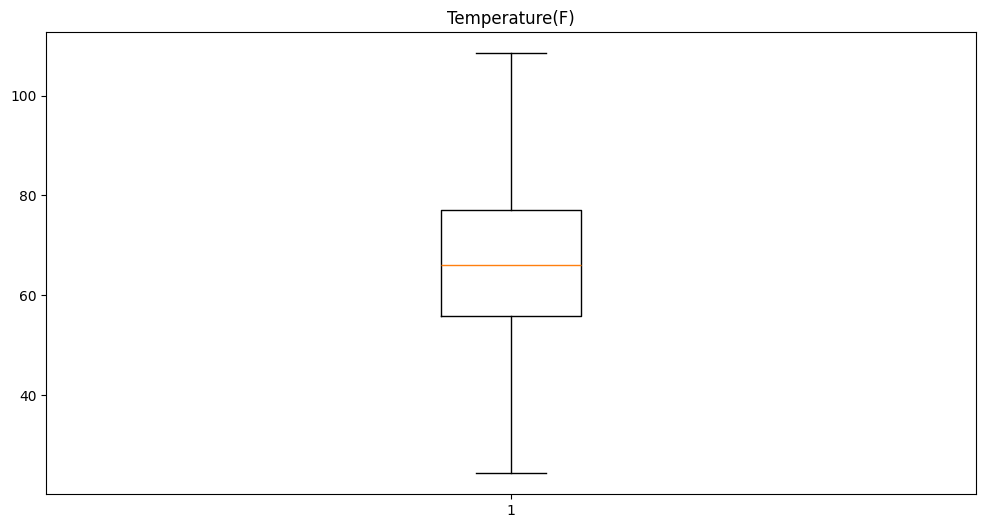

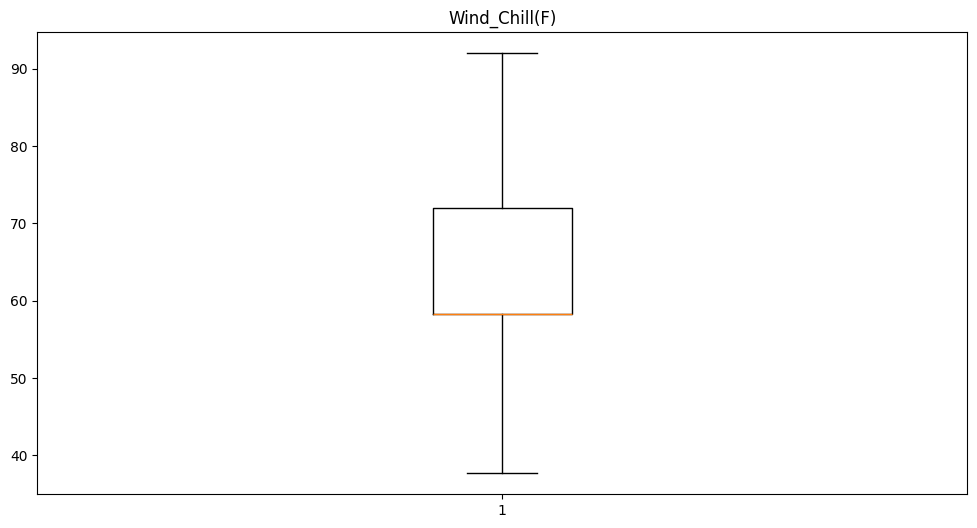

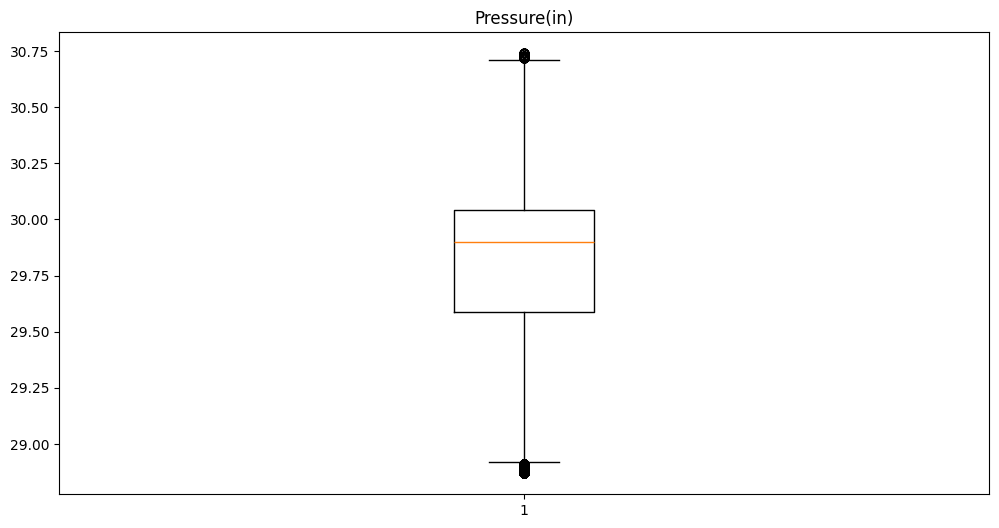

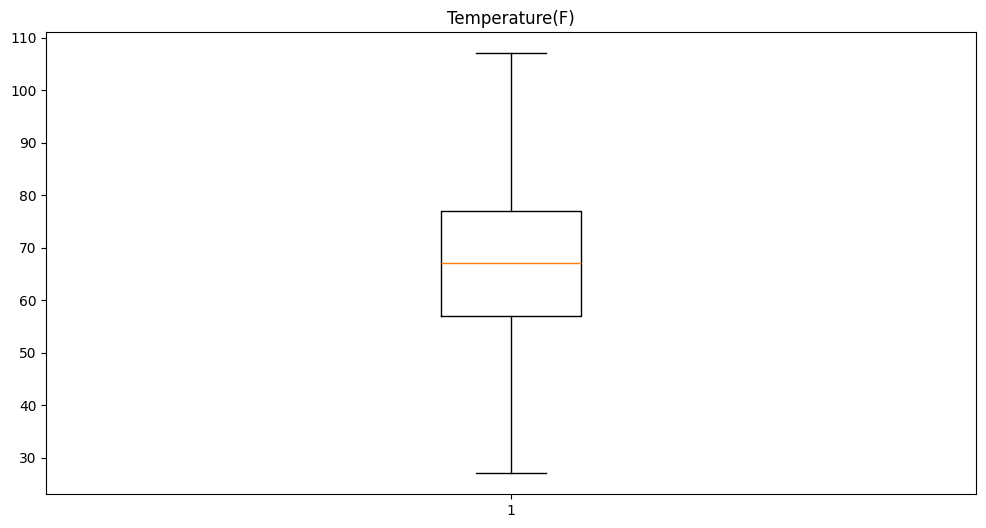

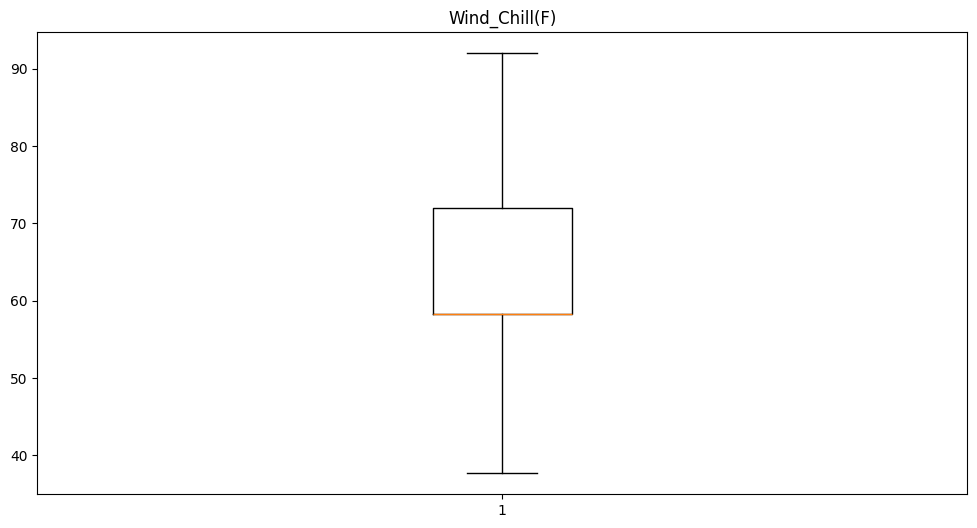

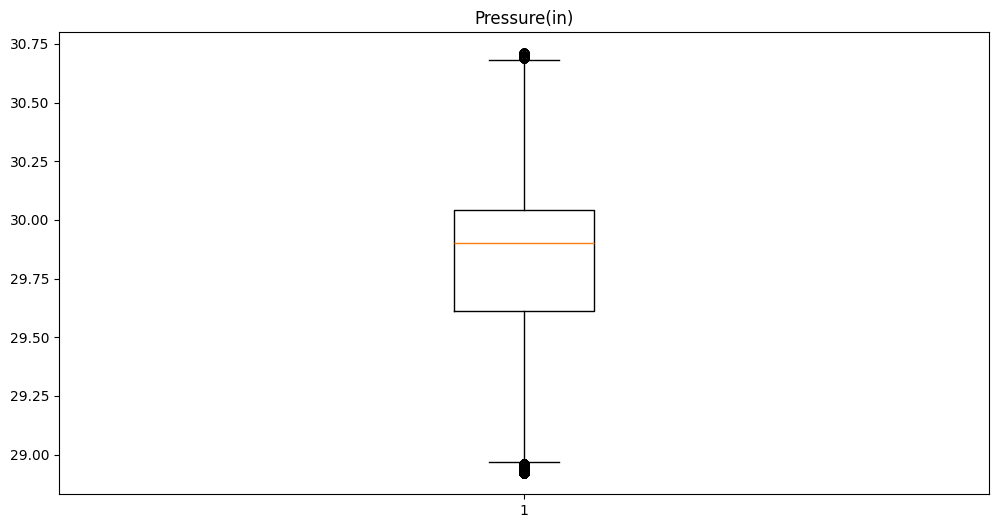

In [38]:
# Run multiple times until you see no pointers beyond the Extremen values or whiskers
for i in range(3):
  for i in negn:
    dfn = Outlier_Treatment(dfn,i)

In [39]:
# Now most of the outliers are removed

### Attribute selection (numerical)

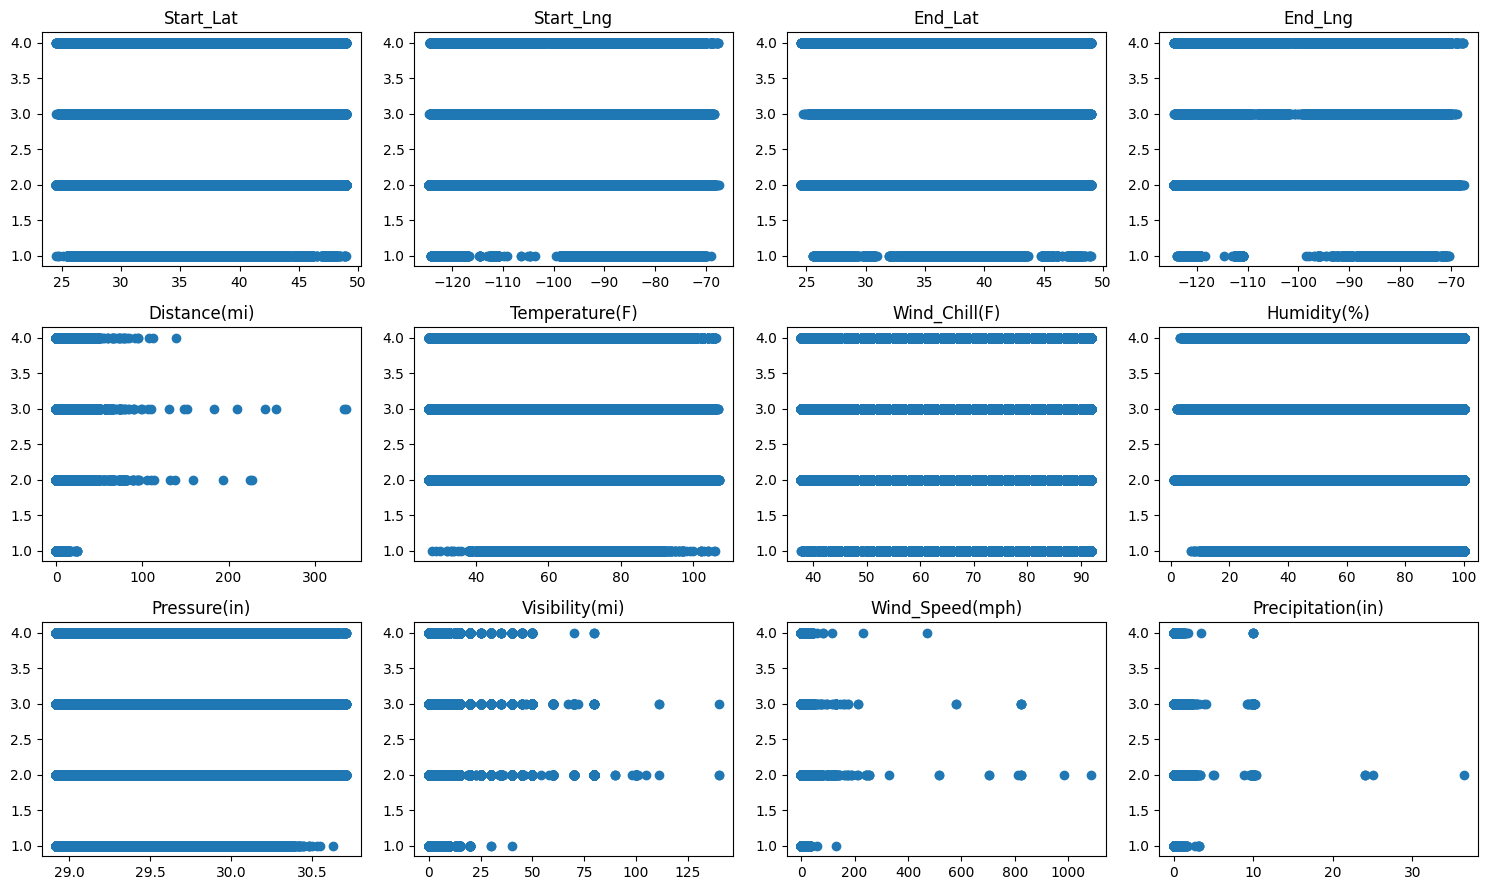

In [40]:
# Checking collinearity b/w the each numerical attribute and the target value Severity

df = dfn

num_plots = len(lin)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig,axes = plt.subplots(num_rows,num_cols,figsize = (15,3*num_rows))
axes = axes.flatten()

for i,j in enumerate(lin):
  ax = axes[i]
  ax.scatter(df[j],df['Severity'])
  ax.set_title(j)

plt.tight_layout()
plt.show()

In [41]:
# As we observe there is no much variance in all the data columns
# Although this may not capture the non-linear relationship b/w then

# We will also check the attribute importance further by any of the following method
"""-> Annova test,
   -> RFE,
   -> Feature_selection using ml models (rf)
"""
# But this methods might be computationally expensive for large data set like we have

'-> Annova test,\n   -> RFE,\n   -> Feature_selection using ml models (rf)\n'

In [42]:
#Using Radom forest to find feature importance

"""
from sklearn.ensemble import RandomForestRegressor

X = df[lin]
X = X.sample(frac=0.4, random_state=42)  # using 40% of the data to reduce computation
y = df['Severity']
y = y.loc[X.index]

# Train Random Forest model
model = RandomForestRegressor(n_estimators=40)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")
"""

# This will take around 20min to run

'\nfrom sklearn.ensemble import RandomForestRegressor\n\nX = df[lin]\nX = X.sample(frac=0.4, random_state=42)  # using 40% of the data to reduce computation\ny = df[\'Severity\']\ny = y.loc[X.index]\n\n# Train Random Forest model\nmodel = RandomForestRegressor(n_estimators=40)\nmodel.fit(X, y)\n\n# Get feature importances\nimportances = model.feature_importances_\nfeature_names = X.columns\n\n# Display feature importances\nfor name, importance in zip(feature_names, importances):\n    print(f"{name}: {importance:.4f}")\n'

In [43]:
# 40% data, 40 n_features
"""
Start_Lat: 0.2141
Start_Lng: 0.2298
End_Lat: 0.0897
End_Lng: 0.0825
Distance(mi): 0.0788
Temperature(F): 0.0470
Wind_Chill(F): 0.0493
Humidity(%): 0.0624
Pressure(in): 0.0819
Visibility(mi): 0.0134
Wind_Speed(mph): 0.0439
Precipitation(in): 0.0074
"""

# sometimes the 40% data which we took might not be sufficient for the model to get the attributes importance
# Despite precipitation, visibility has low values, we will include them as they are important to accident severity (Based on domain knowledge)

'\nStart_Lat: 0.2141\nStart_Lng: 0.2298\nEnd_Lat: 0.0897\nEnd_Lng: 0.0825\nDistance(mi): 0.0788\nTemperature(F): 0.0470\nWind_Chill(F): 0.0493\nHumidity(%): 0.0624\nPressure(in): 0.0819\nVisibility(mi): 0.0134\nWind_Speed(mph): 0.0439\nPrecipitation(in): 0.0074\n'

In [44]:
# By observing both scatter plot and attribute importance, we will remove wind_chill,Humidity and Temperature as they seem like
# not much contributing to prediction of Severity

In [45]:
nre = ['Wind_Chill(F)','Humidity(%)','Temperature(F)']
lin = [i for i in lin if i not in nre]
lin

['Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [46]:
lif = lin+lio+lib
dff = df[lif]
dff['Severity'] = df['Severity']

<ipython-input-46-27b9b190530d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Severity'] = df['Severity']


In [47]:
dff.head()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Time,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Severity
0,39.865147,-84.058723,36.261829,-88.02789,0.01,29.68,10.0,7.0,0.02,2016-02-08 05:46:00,...,False,False,False,False,False,False,False,False,False,3
1,39.928059,-82.831184,36.261829,-88.02789,0.01,29.65,10.0,7.0,0.00,2016-02-08 06:07:59,...,False,False,False,False,False,False,False,False,False,2
8,39.778061,-84.172005,36.261829,-88.02789,0.00,29.67,5.0,1.2,0.00,2016-02-08 08:00:40,...,False,False,False,False,False,False,False,False,False,2
12,39.737633,-84.149933,36.261829,-88.02789,0.00,29.63,3.0,2.3,0.00,2016-02-08 08:36:34,...,False,False,False,False,False,False,False,False,False,2
15,39.745888,-84.170410,36.261829,-88.02789,0.01,29.63,3.0,2.3,0.00,2016-02-08 08:43:20,...,False,False,False,False,False,False,False,False,False,2


### Encoding and Normalization

In [48]:
# Lable encoding for bool data
# Frequency encoding for Categorical data (We can also onehot encoding, but it will increase the number of dimensions)
# Standardizing the numerical data with minmaxscaler or standardscaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
df = dff
for i in lib:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

for i in lio:
  freq = df[i].value_counts(normalize=True)
  df[i] = df[i].map(freq)

for i in lin:
  scaler = MinMaxScaler()
  df[i] = scaler.fit_transform(df[i].values.reshape(-1,1))


<ipython-input-48-f38680d76e92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-48-f38680d76e92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-48-f38680d76e92>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [49]:
df.head()

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Start_Time,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Severity
0,0.626257,0.708929,0.478626,0.639062,0.00003,0.424581,0.071429,0.006440,0.000548,1.695669e-07,...,0,0,0,0,0,0,0,0,0,3
1,0.628830,0.730382,0.478626,0.639062,0.00003,0.407821,0.071429,0.006440,0.000000,1.695669e-07,...,0,0,0,0,0,0,0,0,0,2
8,0.622694,0.706949,0.478626,0.639062,0.00000,0.418994,0.035714,0.001104,0.000000,1.695669e-07,...,0,0,0,0,0,0,0,0,0,2
12,0.621041,0.707335,0.478626,0.639062,0.00000,0.396648,0.021429,0.002116,0.000000,1.695669e-07,...,0,0,0,0,0,0,0,0,0,2
15,0.621378,0.706977,0.478626,0.639062,0.00003,0.396648,0.021429,0.002116,0.000000,1.695669e-07,...,0,0,0,0,0,0,0,0,0,2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5897378 entries, 0 to 7728392
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Start_Lat          float64
 1   Start_Lng          float64
 2   End_Lat            float64
 3   End_Lng            float64
 4   Distance(mi)       float64
 5   Pressure(in)       float64
 6   Visibility(mi)     float64
 7   Wind_Speed(mph)    float64
 8   Precipitation(in)  float64
 9   Start_Time         float64
 10  End_Time           float64
 11  Street             float64
 12  City               float64
 13  County             float64
 14  Zipcode            float64
 15  Airport_Code       float64
 16  Weather_Timestamp  float64
 17  Wind_Direction     float64
 18  Weather_Condition  float64
 19  Amenity            int64  
 20  Bump               int64  
 21  Crossing           int64  
 22  Give_Way           int64  
 23  Junction           int64  
 24  No_Exit            int64  
 25  Railway            int6

In [51]:
df.isnull().sum()

,0
Start_Lat,0
Start_Lng,0
End_Lat,0
End_Lng,0
Distance(mi),0
Pressure(in),0
Visibility(mi),0
Wind_Speed(mph),0
Precipitation(in),0
Start_Time,0


In [52]:
len(df) # total rows reduced from 7.4 million to 5.8 million after EDA

5897378

### Data spliting

In [53]:
x = df.drop('Severity',axis = 1)
y = df['Severity']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.25,random_state = 42)

x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.10, random_state=42)

In [55]:
print(x_train.shape,y_train.shape) # 75% train data
print(x_val.shape,y_val.shape)   # 15% val data
print(x_test.shape,y_test.shape)  # 10% test data

(4423033, 31) (4423033,)
(1326910, 31) (1326910,)
(147435, 31) (147435,)


## Model training

In [ ]:
# We will be using different regression models in order to predict the Severity
"""
-> RandomForest
-> XGboost
-> Ann
"""

'\n-> RandomForest\n-> XGboost\n-> Ann\n'

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelr = RandomForestRegressor(n_estimators=40,max_depth=30, random_state=42)
modelr.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=40, random_state=42)

In [ ]:
# We can use 'GridSearchCv' in order to find optimal hyper parameters
# But as the data is huge is here, doing so will take hours to train and find them
# We need dedicated GPU to do so (free colab gpu is not sufficient where the System RAM and GPU ram are low)

In [ ]:
import joblib
joblib.dump(modelr,'drive/MyDrive/usroad_accident/modelr1.joblib')

['drive/MyDrive/usroad_accident/modelr1.joblib']

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_predv = modelr.predict(x_val)
mse = mean_squared_error(y_val, y_predv)
r2 = r2_score(y_val, y_predv)
print("For validation data: ")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

"""
n_estimators=30,max_depth=25
Mean Squared Error: 0.11574315531201572
R-squared: 0.506099798091123

"""

For validation data: 
Mean Squared Error: 0.11557375914636635
R-squared: 0.5068226468867281


'\nn_estimators=30,max_depth=25\nMean Squared Error: 0.11574315531201572\nR-squared: 0.506099798091123\n'

In [ ]:
# We tune the parameters of the model based on val_loss
# And we predict the final error of test data to evaluate how well the model is working on unknown data

# NOTE: To find best loss or accuracy we can use 'stratifiedkfold' which is gold method, but here the data is huge, it will be computationally expensive (Works with GPU if present)
# the free gpu given by colab won't be suffient for that, as the RAM is low

In [ ]:
y_predt = modelr.predict(x_test)
mse = mean_squared_error(y_test, y_predt)
r2 = r2_score(y_test, y_predt)
print("For test data: ")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

"""
Mean Squared Error: 0.11438749647296462
R-squared: 0.5077216351029538
"""

For test data: 
Mean Squared Error: 0.11438749647296462
R-squared: 0.5077216351029538


In [ ]:
# random forest is compuationaly expensive without a GPU as it has lot of decision trees and splitting criteria in the background

### XGboost

In [56]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.3 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
modelx = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=15, random_state=42)
modelx.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

learning_rate = [0.01, 0.1, 0.2, 0.3]
n_estimators = [100,150,200,250]

lix = []
lixr = []
for i in n_estimators:
  modelx = XGBRegressor(n_estimators=i, learning_rate=0.2, max_depth=25, random_state=42)
  modelx.fit(x_train, y_train)
  y_predx = modelx.predict(x_val)
  msex = mean_squared_error(y_val, y_predx)
  lix.append(msex)
  r2x = r2_score(y_val, y_predx)
  lixr.append(r2x)



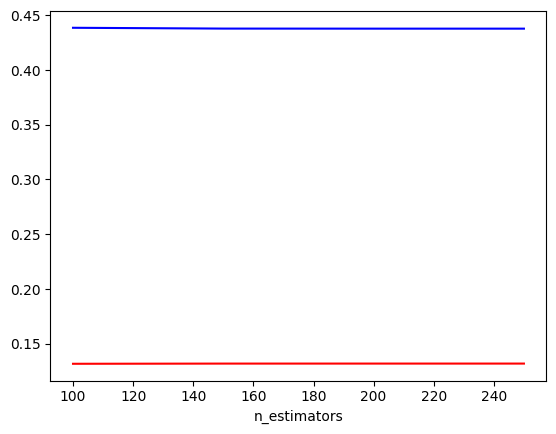

In [ ]:
plt.plot(n_estimators, lixr, label='r2_score', color='blue')
plt.plot(n_estimators, lix, label='mean_squared_error', color='red')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
#As we have seen above the loss is constant for all the given values of n_estimators

In [57]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

max_depth = [10,15,20,25,30,35,40]

lix = []
lixr = []
for i in max_depth:
  modelx = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=i, random_state=42)
  modelx.fit(x_train, y_train)
  y_predx = modelx.predict(x_val)
  msex = mean_squared_error(y_val, y_predx)
  lix.append(msex)
  r2x = r2_score(y_val, y_predx)
  lixr.append(r2x)



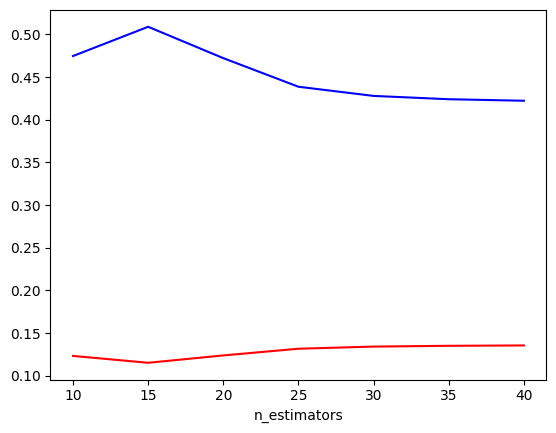

In [58]:
plt.plot(max_depth, lixr, label='r2_score', color='blue')
plt.plot(max_depth, lix, label='mean_squared_error', color='red')
plt.xlabel('max_depth')
plt.show()

In [ ]:
# as we see the elbow point at max_depth 15, after that r2_score decreases and loss increases

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_predx = modelx.predict(x_val)
msex = mean_squared_error(y_val, y_predx)
r2x = r2_score(y_val, y_predx)
print("For validation data: ")
print("Mean Squared Error:", msex)
print("R-squared:", r2x)

"""
For validation data:
Mean Squared Error: 0.1278708517859749
R-squared: 0.454348385914474
"""


For validation data: 
Mean Squared Error: 0.1278708517859749
R-squared: 0.454348385914474


In [ ]:
y_predx1 = modelx.predict(x_test)
msex1 = mean_squared_error(y_test, y_predx1)
r2x1 = r2_score(y_test, y_predx1)
print("For test data: ")
print("Mean Squared Error:", msex1)
print("R-squared:", r2x1)

"""
For test data:
Mean Squared Error: 0.12677074320762605
R-squared: 0.45442905818134405
"""


For test data: 
Mean Squared Error: 0.12677074320762605
R-squared: 0.45442905818134405


### ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

modela = Sequential()
modela.add(Dense(64,activation='relu',input_shape=(x_train.shape[1],)))
modela.add(Dropout(0.5))
modela.add(Dense(128,activation='relu'))
modela.add(Dropout(0.5))
modela.add(Dense(64,activation='relu'))
modela.add(Dropout(0.3))
modela.add(Dense(1))

modela.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
modela.fit(x_train,y_train,epochs=10,batch_size=64,validation_data = (x_val,y_val),verbose=1)

Epoch 1/10
69110/69110 [==============================] - 162s 2ms/step - loss: 0.2041 - mean_squared_error: 0.2041 - val_loss: 0.1890 - val_mean_squared_error: 0.1890
Epoch 2/10
69110/69110 [==============================] - 160s 2ms/step - loss: 0.1907 - mean_squared_error: 0.1907 - val_loss: 0.1812 - val_mean_squared_error: 0.1812
Epoch 3/10
69110/69110 [==============================] - 159s 2ms/step - loss: 0.1880 - mean_squared_error: 0.1880 - val_loss: 0.1803 - val_mean_squared_error: 0.1803
Epoch 4/10
69110/69110 [==============================] - 161s 2ms/step - loss: 0.1865 - mean_squared_error: 0.1865 - val_loss: 0.1785 - val_mean_squared_error: 0.1785
Epoch 5/10
69110/69110 [==============================] - 160s 2ms/step - loss: 0.1854 - mean_squared_error: 0.1854 - val_loss: 0.1789 - val_mean_squared_error: 0.1789
Epoch 6/10
69110/69110 [==============================] - 163s 2ms/step - loss: 0.1845 - mean_squared_error: 0.1845 - val_loss: 0.1786 - val_mean_squared_error:

In [ ]:
# as we can see the val_loss is approximately 0.17

In [ ]:
y_preda1 = modelr.predict(x_test)
msea1 = mean_squared_error(y_test, y_preda1)
r2a1 = r2_score(y_test, y_preda1)
print("For test data: ")
print("Mean Squared Error:", msea1)
print("R-squared:", r2a1)


In [ ]:
print("Randomforest: ")
print("val mse: ",mse)
print("val r2score: ",r2)


print("XGboost: ")
print("mse: ",msex1)
print("r2score: ",r2x1)
print("")

print("ANN: ")
print("mse: ",msea1)
print("r2score: ",r2a1)

### Polynomial regression

#### See the project in github

In [ ]:
#https://github.com/viVeK21111/Us-Accident-severity-prediction